# MNIST Classification

### Importing Libraries

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Loading MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

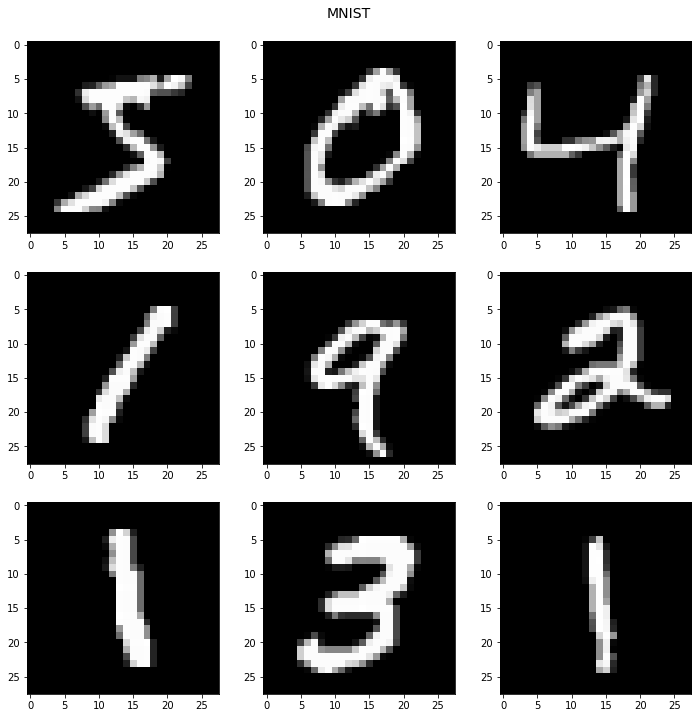

In [4]:
rows = 3
columns = 3

fig, axs = plt.subplots(rows, columns, figsize=(4*columns, 4*rows))
ctr = 0
for i in range(rows):
    for j in range(columns):
        axs[i][j].imshow(X_train[ctr], cmap='gray')
        ctr = ctr + 1;

plt.suptitle("MNIST", y=0.92, fontsize=14)
plt.show()

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

### Reshaping

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 1))

### Normalizing

In [8]:
X_train = X_train / 255
X_test = X_test / 255

### One-Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
num_classes = y_train.shape[1]

### Model Building

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def build_model(): 
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Model Fitting

In [13]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.3717 - accuracy: 0.8867 - val_loss: 0.0691 - val_accuracy: 0.9780
Epoch 2/10
300/300 - 1s - loss: 0.0892 - accuracy: 0.9725 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 3/10
300/300 - 1s - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0419 - val_accuracy: 0.9869
Epoch 4/10
300/300 - 1s - loss: 0.0567 - accuracy: 0.9827 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 5/10
300/300 - 1s - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 6/10
300/300 - 1s - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0251 - val_accuracy: 0.9910
Epoch 7/10
300/300 - 1s - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0242 - val_accuracy: 0.9916
Epoch 8/10
300/300 - 1s - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0258 - val_accuracy: 0.9918
Epoch 9/10
300/300 - 1s - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0263 - val_accuracy: 0.9908
Epoch 10/10
300/300 - 1s - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0239 - val_accuracy: 0.9916

### Model Evaluation

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy Score: {:.2f}".format(scores[1]))

Accuracy Score: 0.99


### Inference

In [15]:
from tensorflow.keras.backend import expand_dims

def get_prediction(normalized_img): 
    prediction = model.predict(expand_dims(normalized_img, 0))
    return np.argmax(prediction, axis=-1)[0], prediction

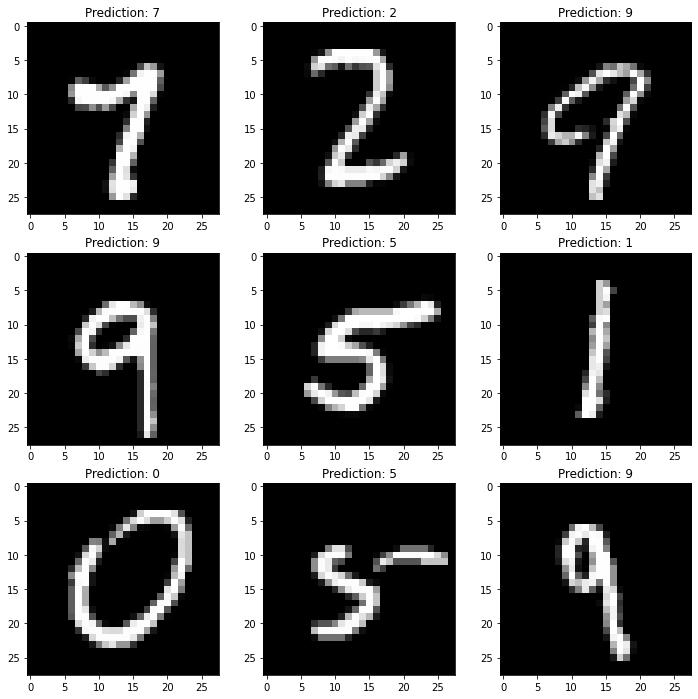

In [16]:
import numpy as np

rows = 3
columns = 3

idx_list = np.random.randint(X_test.shape[0], size=(rows * columns))

fig, axs = plt.subplots(rows, columns, figsize=(4*columns, 4*rows))
ctr = 0
for i in range(rows):
    for j in range(columns):
        img = X_test[idx_list[ctr]]
        axs[i][j].imshow(img[:,:,0], cmap='gray')
        axs[i][j].set_title("Prediction: {}".format(get_prediction(img)[0]))
        ctr = ctr + 1;

plt.show()

In [17]:
model.save('mnist_model.h5')

# References

[1] [Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)